# Dataset Merging, Filtering, and Calculating Correlations
Data are from CoinGecko, Yahoo!Finance.

In [1]:
# libraries
import pandas as pd
import numpy as np

## 1. Load Data

In [2]:
# load the data set with bitcoin price, market cap, and trade volume
df1 = pd.read_csv(r'Inputs\btc-usd-max.csv')

# load the S&P 500 data
df2 = pd.read_html(r'Inputs\yahoo_sp500.html')[0]

## 2. Process Data

In [3]:
# resolve dates
df1['snapped_at'] = pd.to_datetime(
    df1['snapped_at'],
    format='%Y-%m-%d %H:%M:%S %Z'
).dt.tz_convert(
    None
)
df2['Date'] = pd.to_datetime(df2['Date'], infer_datetime_format=True)

In [4]:
# keep prices only
df1 = df1[['snapped_at', 'price']].copy()
df2 = df2[
    [
        'Date',
        'Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.'
    ]
].copy()

# rename columns
df1.columns = ['Date', 'Bitcoin']
df2.columns = ['Date', 'S&P 500']

In [5]:
# keep the same range of dates
df1 = df1[df1['Date'].between('2013-04-28', '2025-04-21')].copy()
df2 = df2[df2['Date'].between('2013-04-28', '2025-04-21')].copy()

## 3. Merge the Two Data Sets on Dates

In [6]:
# merge the two data sets
df = df1.merge(df2, on=['Date'], how='outer')

In [7]:
# keep the observations where values are not missing
df = df[~df['Bitcoin'].isnull() & ~df['S&P 500'].isnull()].copy()

## 4. Show Correlations

In [8]:
# simple correlations in levels (don't make much sense due to non-stationarity)
df.set_index(['Date']).corr()

,Bitcoin,S&P 500
Bitcoin,1.000000,0.930246
S&P 500,0.930246,1.000000


In [9]:
# produce simple returns and log returns
df = df.set_index(['Date']).copy()
df['Bitcoin R'] = (df['Bitcoin'] / df['Bitcoin'].shift(1) - 1)
df['S&P 500 R'] = (df['S&P 500'] / df['S&P 500'].shift(1) - 1)

In [10]:
# show correlations in returns for the whole range
df[~df.isnull().any(axis=1)][['Bitcoin R', 'S&P 500 R']].corr()

,Bitcoin R,S&P 500 R
Bitcoin R,1.000000,-0.011998
S&P 500 R,-0.011998,1.000000


In [11]:
# show correlations in returns for the last five years
df[df.index >= '2020-04-22'][['Bitcoin R', 'S&P 500 R']].corr()

,Bitcoin R,S&P 500 R
Bitcoin R,1.000000,0.020935
S&P 500 R,0.020935,1.000000


(-0.2, 0.2)

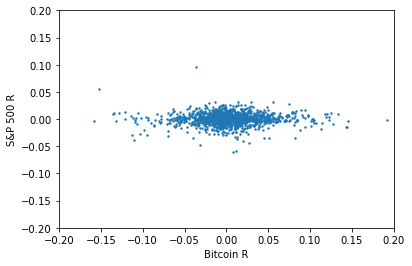

In [12]:
# show a scatter plot of returns for the last five years
plt = df[
    df.index >= '2020-04-22'
][
    ['Bitcoin R', 'S&P 500 R']
].plot.scatter(
    x='Bitcoin R',
    y='S&P 500 R',
    s=2
)
plt.set_xlim(-0.2, 0.2)
plt.set_ylim(-0.2, 0.2)

End.